<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Exponential%20Smoothing/ETS_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [ ]:
!wget nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2022-02-03 09:34:10--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-02-03 09:34:10--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-02-03 09:34:10 (18.7 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]

FINISHED --2022-02-03 09:34:10--
Total wall clock time: 0.4s
Downloaded: 1 files, 1.6K in 0s (18.7 MB/s)


In [ ]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [ ]:
import pandas as pd
df = pd.read_csv('/content/perrin-freres-monthly-champagne.csv', index_col='Month', skipfooter=2, parse_dates=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


So pretty much what we expect the month is the index in the champagne sales are the one and only column

In [ ]:
df.columns = ['Sales']

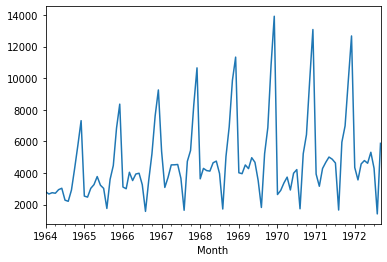

In [ ]:
df['Sales'].plot()

Here's what we notice about this data.

First, we recognize that there is seasonality in this data.

Second, we see that there might be a slight trend, but the seasonal pattern is definitely more obvious.

Third, note that the seasonal pattern is not constant, but seems to increase over time, at least to a point.

In [ ]:
df.index.freq = 'MS'

# set index frequency for months columns

In [ ]:
Ntest = 12
train = df.iloc[:-Ntest] #data train
test = df.iloc[-Ntest:] #data test

In [ ]:
# boolean series to index df rows

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12)

res_hw = hw.fit()

In [ ]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [ ]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

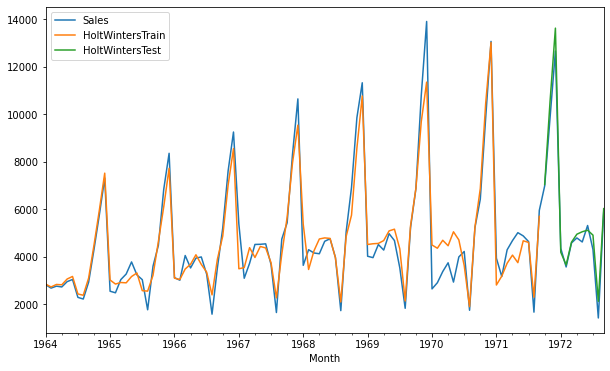

In [ ]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(10, 6))

You can see, it's a pretty reasonable fit.

In [ ]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9173433323379416

In [ ]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9735808870459498

for r2 score, the closer the value is to 1, the better